<a href="https://colab.research.google.com/github/x94173000/Prediction-of-quality-of-Wine/blob/main/%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E5%88%86%E9%A1%9E%E9%A0%90%E6%B8%AC(2)%EF%BC%9ABaseline_%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **載入&認識資料**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

**欄位定義**

*   fixed acidity：非揮發性酸(不易揮發)
*   volatile acidity：揮發性酸，如果濃度太高會導致紅酒的口感變差、像醋一樣
*   citric acid：檸檬酸，少量、數值在0-1之間，能夠添增紅酒的風味和新鮮度
*   residual sugar：發酵後的剩餘糖分，1公升紅酒裡糖分多大於1g，而大於45g/L則會很甜
*   chlorides：氯化物，即紅酒中的鹽分
*   free sulfur dioxide：游離二氧化硫，可防止微生物生長及紅酒氧化
*   total sulfur dioxide：總二氧化硫，低濃度下難以察覺，但當二氧化硫大於50ppm時，在酒的氣味和口感中變得明顯。
*   density：水的密度，與酒精和糖的百分比有關
*   pH：酸鹼值，大部分酒的酸鹼值在3-4之間
*   sulphates：硫酸鹽，能夠促使二氧化硫濃度上升，且具有抗氧化和抗微生物作用的添加劑
*   alcohol：酒精濃度，紅酒中酒精所佔的百分比
*   quality：紅酒的品質，以0到10分來表示，應變數


觀察資料

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

從標準差來看，除free sulfur dioxide、total sulfur dioxide變異較大，其餘變數資料分布還算集中




In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# **EDA分析**

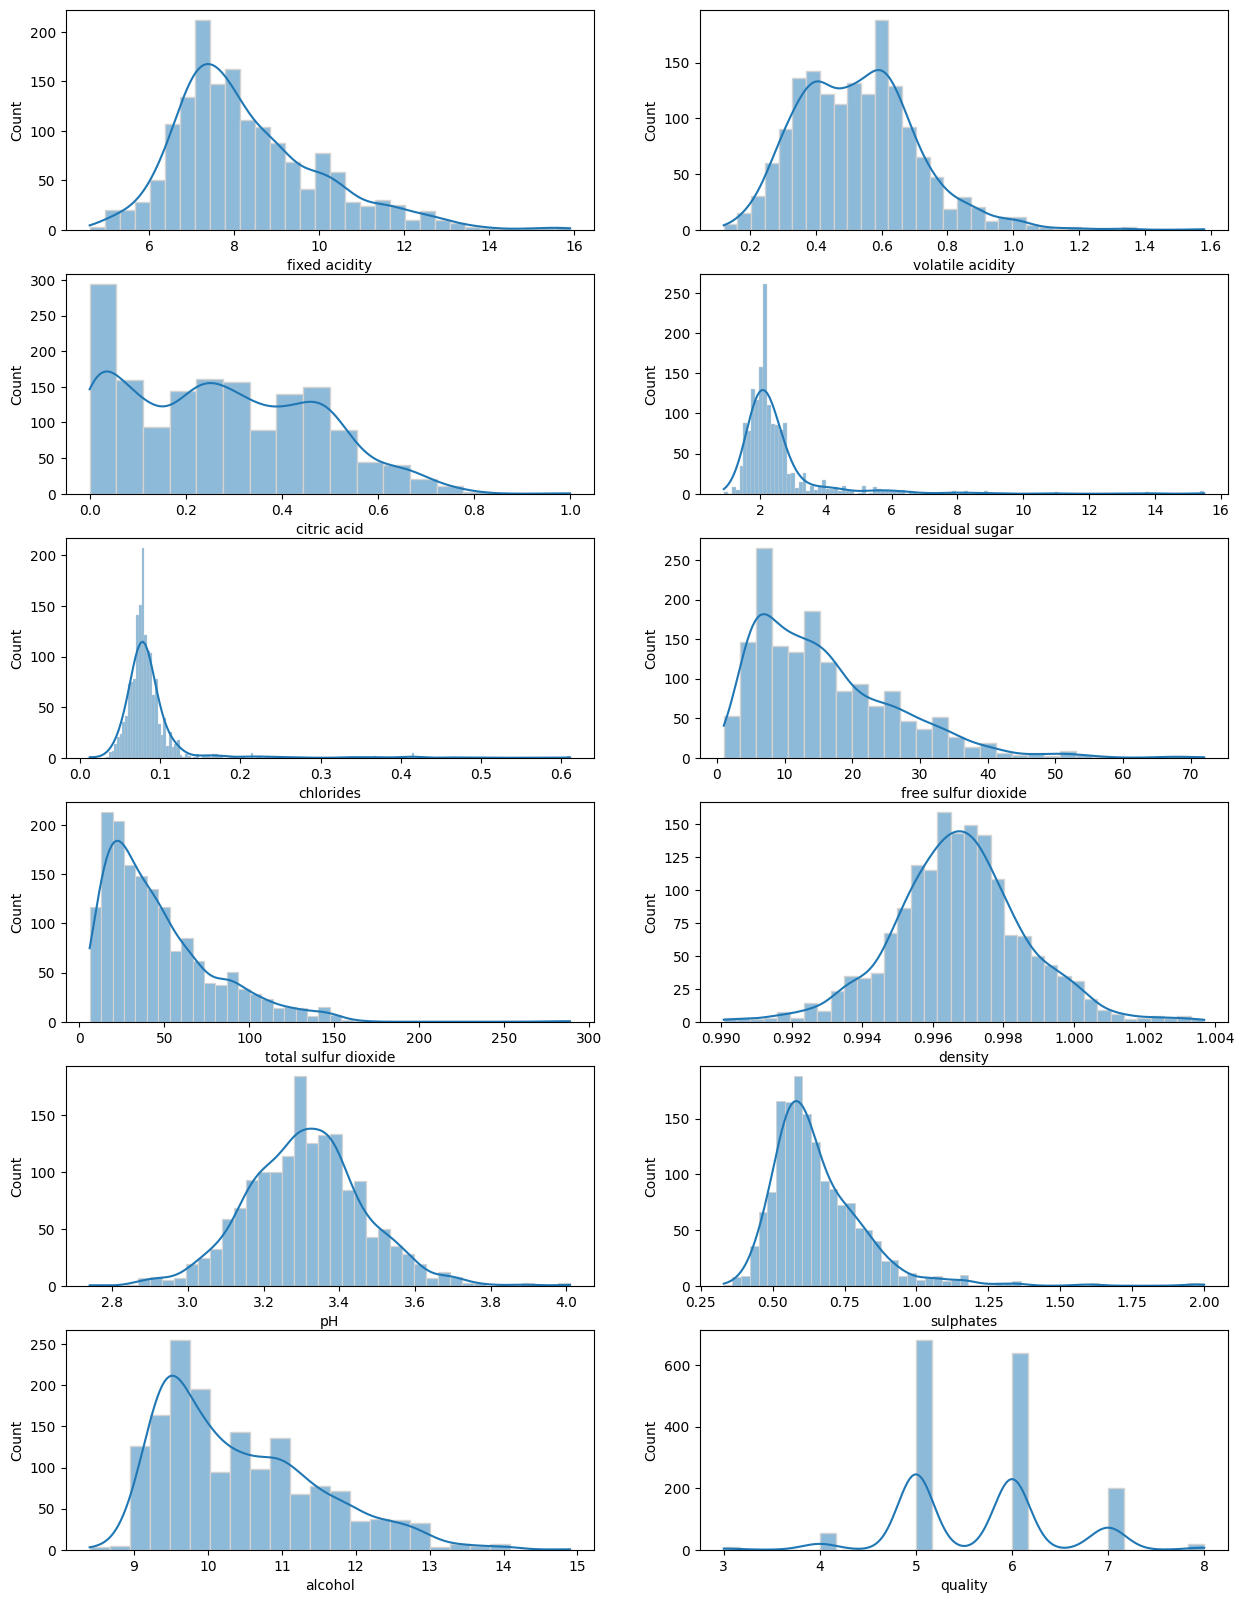

In [ ]:
#將所有變數繪製成次數分配表
i = 1
plt.figure(figsize=(15,20))
for col in df.columns:
  plt.subplot(6,2,i)
  sns.histplot(df[col], kde=True, edgecolor='lightgrey')
  i+=1

紅酒的品質分數有逾八成在5到6分之間，最高8分

<ipython-input-10-56b8f73190ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'quality', data= df, palette = 'pastel')


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

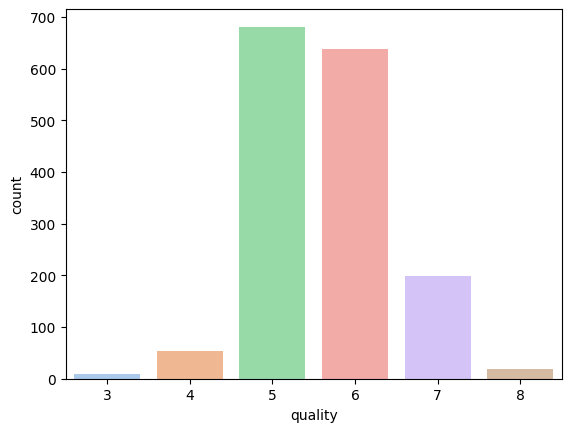

In [ ]:
#計算每個品質分數對應的紅酒數量
sns.countplot(x = 'quality', data= df, palette = 'pastel')

df['quality'].value_counts()

接下來了解不同變數之間的關係

In [ ]:
#不同變數和quality的相關係數，由大到小排序
correlation = df.corr()['quality'].sort_values(ascending=False)
print(correlation)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


從相關係數來看，alcohol與quality 的相關係數最大(0.47)

另外fixed acidity和density、free sulfur dioxide和total sulfur dioxide也呈正相關(0.67)

<Axes: >

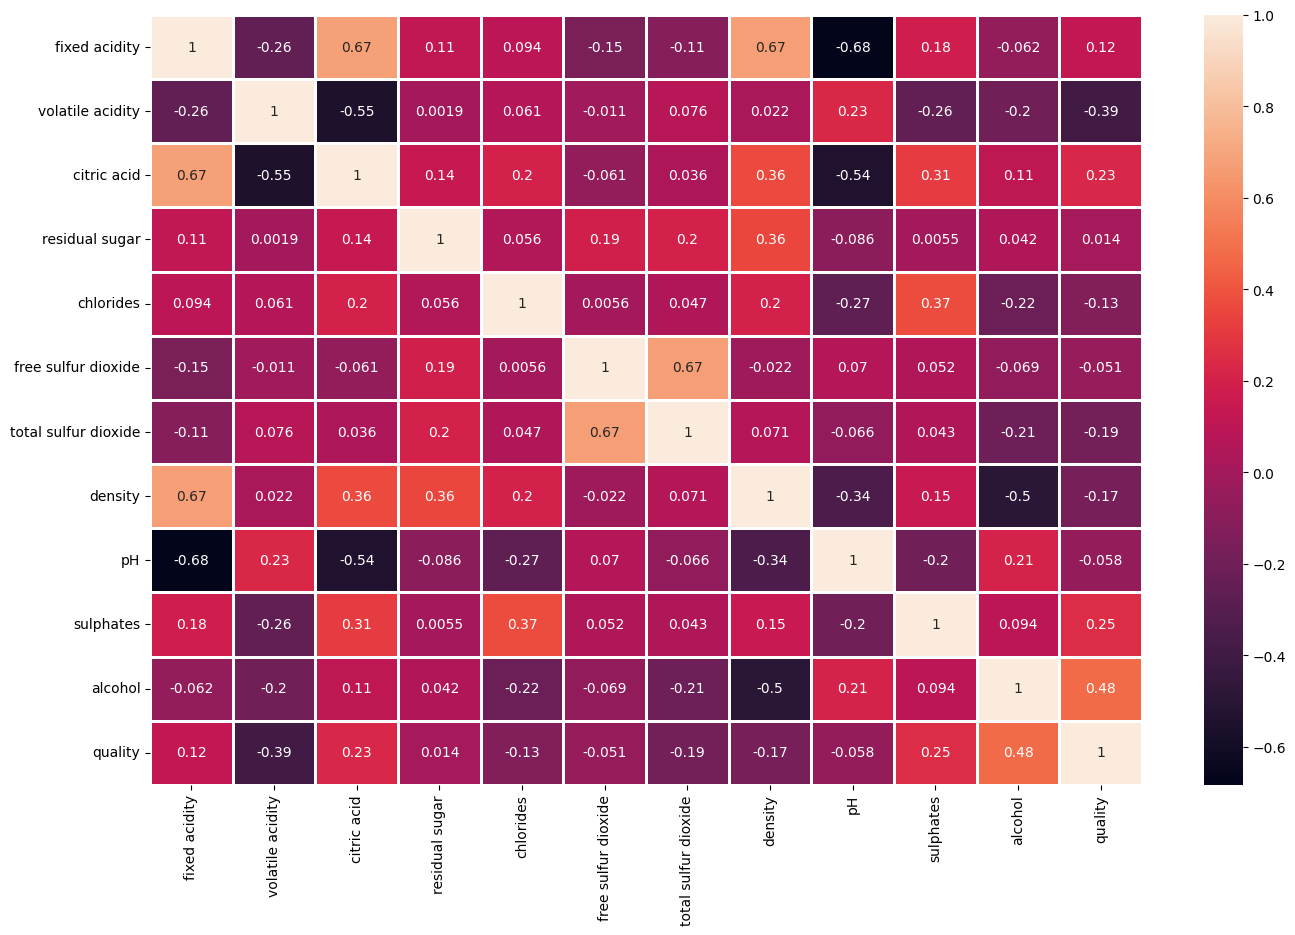

In [25]:
#相關係數的heatmap
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, linewidth = 1)

初步了解資料發現：
*   整份1599筆資料集中無任何遺失值
*   資料集欄位皆為數值(特徵是浮點數；標籤為整數)
*   從標準差來看，除free sulfur dioxide、total sulfur dioxide變異較大，其餘變數資料分布還算集中
*   alcohol與quality 的相關係數最大(0.47)
*   fixed acidity和density、free sulfur dioxide和total sulfur dioxide呈正相關(0.67)



在資料分析的工作流程中，必備的環節有：


1.   資料收集:從原始資料到決定存放資料庫的過程，通常涉及資料獲取、資料爬蟲、資料庫管理、資料倉儲等議題

2.   EDA分析:了解資料的基本資訊

3.   資料清整:對收集來的資料集做處理，如資料中的錯誤訊息、雜訊等，避免影響模型的準確性

4.   模型訓練:選擇合適的模型(如回歸、分類、機器學習等)進行資料集訓練

5.   決策應用:解釋模型結果，並可透過資料視覺化、圖表的方式呈現上述步驟的結果，同時反思模型的可優化之處


# **資料清整**

由於無缺失值，也無類別資料需轉換，在此先不處理

**Baseline版本**

In [ ]:
df_train = df.copy()

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#分割特徵和標籤
X = df_train.drop('quality', axis = 1)
y = df_train['quality']

#分割訓練集和測試集
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

#建立並評估模型
rfc = RandomForestClassifier(n_estimators = 200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.671875   0.6875     0.65625    0.69140625 0.74901961]
